In [1]:
# Import the necesary libraries
import pandas as pd
import numpy as np
import re
import os

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [2]:
# convert list of lists to list
def flatten(lst):
    return [item for sublist in lst for item in sublist]

# remove symbols
def remove_symbols(entry):
    entry = re.sub(r'[^A-Za-z]', ' ', entry)
    return entry

# remove single letter
def remove_char(entry): 
    entry = re.sub(r'\b\w\b', '', entry)
    return entry

# sort on length
# df.sort(key=len, reverse=False)

# clean data (to lowercase, remove links, symbols, and stop words, stemming or lemmatization, tokenization)
def clean_data(df, process):
    df = [re.sub('@[A-Za-z0-9_]+', '', entry) for entry in df]
    df = [re.sub('#[A-Za-z0-9_]+', '', entry) for entry in df]
    df = [re.sub('https?://\S+', '', entry) for entry in df]
    df = [re.sub('(htt|RT)', '', entry) for entry in df]
    df = [entry.lower() for entry in df]
    df = [remove_symbols(entry) for entry in df]
    df = flatten([word_tokenize(entry) for entry in df])
    
    stop_words = set(stopwords.words('english'))
    df = [entry for entry in df if entry not in stop_words]    
    if (process == 'stem'):
        stemmer = SnowballStemmer("english")
        df = [stemmer.stem(entry) for entry in df]
    elif (process == 'lemma'):
        word_lemmatized = WordNetLemmatizer()     
        df = [word_lemmatized.lemmatize(entry) for entry in df]
    df = [remove_char(entry) for entry in df]
    return df

# WordCloud
def wordy_cloud(df):
    print('The number of words in the document is', len(df))
    long_string = " ".join(list(df))
    wordcloud = WordCloud(background_color="white", max_words=5000, width = 900, height = 450, contour_width=3, contour_color='steelblue', random_state=1010)
    wordcloud.generate(long_string)
    display(wordcloud.to_image())

# complete process
def complete_process(PATH, filename, process):
    df = pd.read_csv(os.path.join(PATH, filename), encoding='utf-8')
    df = df.iloc[:, 1] # select the appropriate column based on location
    df2 = clean_data(df, process)
    wordy_cloud(df2)

The number of words in the document is 419267


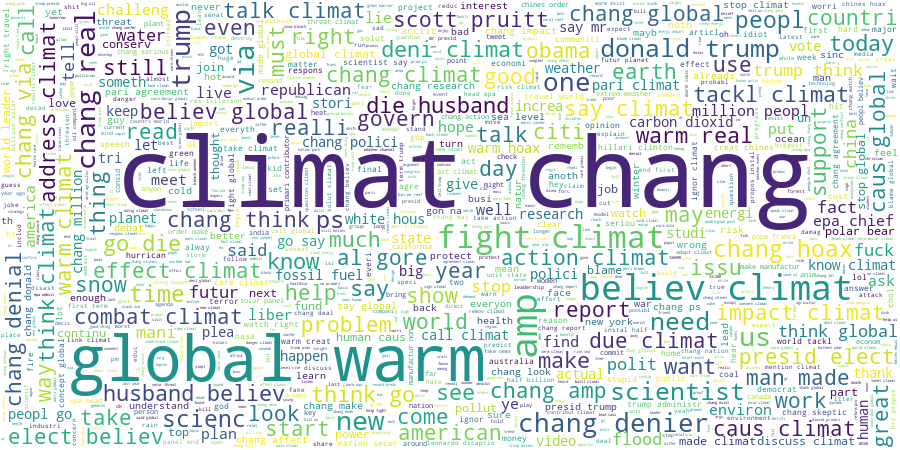

In [3]:
PATH = 'datasets/tweets_data/'
filename = 'twitter_sentiment_data'
complete_process(PATH, f'{filename}.csv', process='stem')

The number of words in the document is 419267


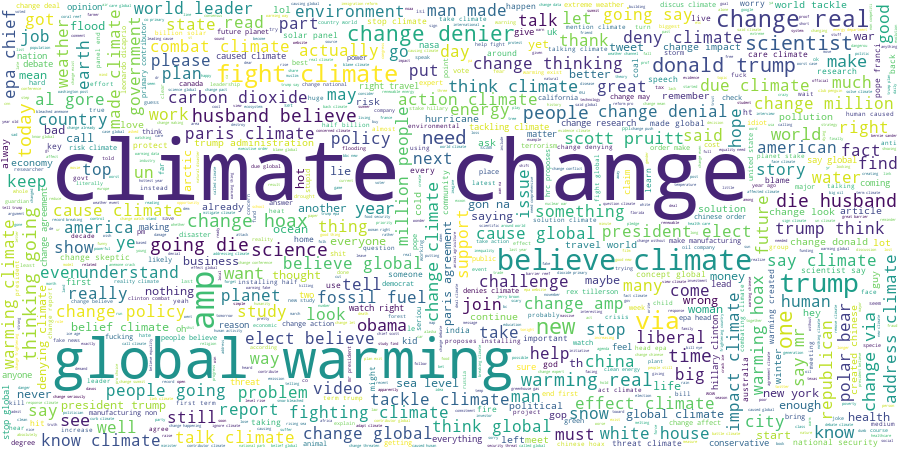

In [4]:
complete_process(PATH, f'{filename}.csv', process='lemma')